# Black-Scholes - Theta and Gamma

> Author: Gustavo Monteiro de Athayde  
> Monitor: Sylvio Ximenez de Azevedo Neto - <<sylvioxan@insper.edu.br>>  
> Date: 15/03/2025



In [1]:
# dependencies
from lib import derivatives as dg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Bridge

In [5]:
# parameters
rf = 0.0
q = 0.0
vol = 0.4

# calls 
calls_strikes = np.array([70, 80, 130])
call_qtied = np.array([0, 1, 0])

# puts
puts_strikes = np.array([80, 120, 160])
put_qtied = np.array([0, 1, 0])

terms = [ 0.0001, 0.25, 1]

# calls and puts
columns = ['call_1_0.0001', 'call_1_0.25', 'call_1_1', 'call_2_0.0001', 'call_2_0.25', 'call_2_1', 'call_3_0.0001', 'call_3_0.25', 'call_3_1', 'put_1_0.0001', 'put_1_0.25', 'put_1_1', 'put_2_0.0001', 'put_2_0.25', 'put_2_1', 'put_3_0.0001', 'put_3_0.25', 'put_3_1']	
calls_puts = pd.DataFrame(columns=columns)

# calculas BS calls and puts prices for each strike for spot from 1 to 200
for spot in range(1, 201):
    for i in range(3):
        for term in terms:
            calls_puts.loc[spot, f'call_{i+1}_{term}'] = dg.bs_call_option(spot, calls_strikes[i], term, rf, vol)
            calls_puts.loc[spot, f'put_{i+1}_{term}'] = dg.bs_put_option(spot, puts_strikes[i], term, rf, vol)


In [6]:
calls_puts

,call_1_0.0001,call_1_0.25,call_1_1,call_2_0.0001,call_2_0.25,call_2_1,call_3_0.0001,call_3_0.25,call_3_1,put_1_0.0001,put_1_0.25,put_1_1,put_2_0.0001,put_2_0.25,put_2_1,put_3_0.0001,put_3_0.25,put_3_1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,79.0,79.0,119.0,119.0,119.0,159.0,159.0,159.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,78.0,78.0,118.0,118.0,118.0,158.0,158.0,158.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,77.0,77.0,117.0,117.0,117.0,157.0,157.0,157.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,76.0,76.0,116.0,116.0,116.0,156.0,156.0,156.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,75.0,115.0,115.0,115.0,155.0,155.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,126.0,126.000001,126.073237,116.0,116.000019,116.214661,66.0,66.234043,70.992797,0.0,0.000019,0.214661,0.0,0.070723,3.214399,0.0,2.859989,13.709956
197,127.0,127.0,127.070522,117.0,117.000017,117.20745,67.0,67.218871,71.883974,0.0,0.000017,0.20745,0.0,0.065576,3.138458,0.0,2.730204,13.472254
198,128.0,128.0,128.067912,118.0,118.000015,118.200489,68.0,68.204644,72.7775,0.0,0.000015,0.200489,0.0,0.060793,3.064314,0.0,2.605706,13.238459
199,129.0,129.0,129.065402,119.0,119.000013,119.193769,69.0,69.191305,73.673326,0.0,0.000013,0.193769,0.0,0.05635,2.991926,0.0,2.486315,13.008515


In [9]:
# calculate structure price for each term for spot from 1 to 200
structure = pd.DataFrame(columns=terms)
for spot in range(1, 201):
    for term in terms:
        structure.loc[spot, term] = calls_puts.loc[spot, f'call_1_{str(term)}'] * call_qtied[0] + \
                                    calls_puts.loc[spot, f'call_2_{str(term)}'] * call_qtied[1] + \
                                    calls_puts.loc[spot, f'call_3_{str(term)}'] * call_qtied[2] + \
                                    calls_puts.loc[spot, f'put_1_{str(term)}'] * put_qtied[0] + \
                                    calls_puts.loc[spot, f'put_2_{str(term)}'] * put_qtied[1] + \
                                    calls_puts.loc[spot, f'put_3_{str(term)}'] * put_qtied[2]

structure

,0.0001,0.2500,1.0000
1,119.0,119.0,119.0
2,118.0,118.0,118.0
3,117.0,117.0,117.0
4,116.0,116.0,116.0
5,115.0,115.0,115.0
...,...,...,...
196,116.0,116.070742,119.429061
197,117.0,117.065593,120.345908
198,118.0,118.060808,121.264803
199,119.0,119.056363,122.185695


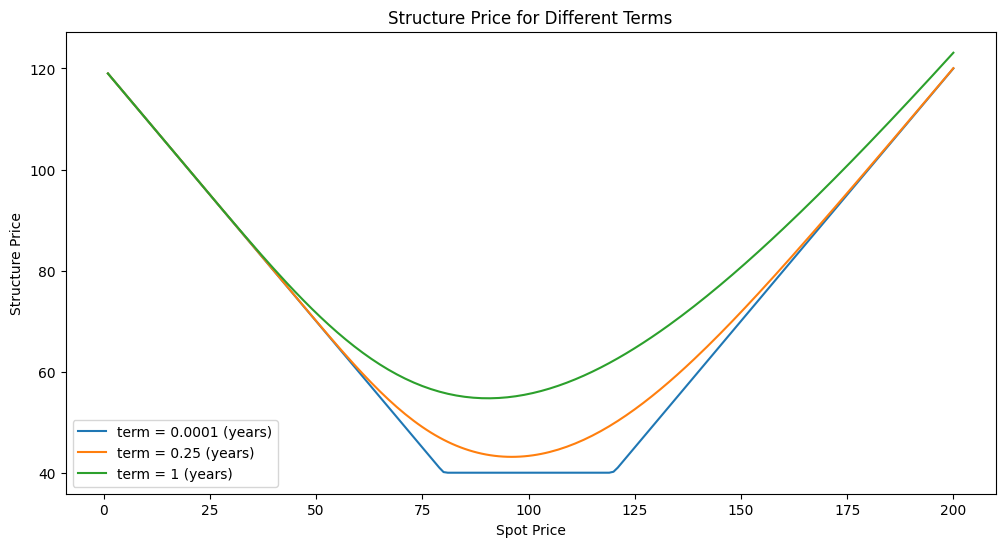

In [10]:
# plot structure price for each term
plt.figure(figsize=(12, 6))

for term in terms:
    plt.plot(structure[term], label=f'term = {term} (years)')

plt.legend()
plt.xlabel('Spot Price')
plt.ylabel('Structure Price')
plt.title('Structure Price for Different Terms')
plt.show()